# **1. Perkenalan Dataset**


Pada proyek ini, dataset yang digunakan adalah Online Payment Fraud Detection yang diperoleh dari Kaggle (open-source).
Dataset ini berisi data transaksi pembayaran online yang digunakan untuk mendeteksi apakah suatu transaksi tergolong fraud (penipuan) atau bukan fraud. Setiap baris data merepresentasikan satu transaksi dengan berbagai fitur seperti:
- Waktu transaksi (step)
- Jumlah transaksi (amount)
- Saldo pengirim dan penerima sebelum dan sesudah transaksi
- Jenis transaksi (type)
- Label target isFraud yang menunjukkan apakah transaksi tersebut merupakan penipuan

Tujuan utama penggunaan dataset ini adalah membangun sistem machine learning yang mampu mendeteksi transaksi fraud secara otomatis berdasarkan pola data historis.

# **2. Import Library**

Pada tahap ini, beberapa pustaka Python diimpor untuk mendukung proses analisis data, visualisasi, preprocessing, serta persiapan data sebelum digunakan dalam pemodelan machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

Library yang digunakan memiliki fungsi sebagai berikut:
- pandas & numpy: manipulasi dan pengolahan data
- matplotlib & seaborn: visualisasi data
- scikit-learn: preprocessing dan persiapan data
- imbalanced-learn (SMOTE): menangani ketidakseimbangan kelas pada dataset fraud

# **3. Memuat Dataset**

Dataset dimuat dari file CSV hasil unduhan Kaggle. Setelah dataset berhasil dimuat, dilakukan pemeriksaan awal untuk memahami struktur data, tipe fitur, serta memastikan tidak ada masalah pada proses loading data. Langkah ini bertujuan untuk:
- Melihat contoh data awal
- Memeriksa jumlah baris dan kolom
- Mengidentifikasi tipe data setiap fitur
- Mendeteksi nilai kosong (missing values)

In [ ]:
df = pd.read_csv("/content/onlinepaymentfraud_dataset.csv")
display(df.head())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5718958 entries, 0 to 5718957
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 480.0+ MB


In [ ]:
df.shape

(5718958, 11)

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,1
isFraud,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
display(df.describe())

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5.718958e+06,5.718958e+06,5.718958e+06,5.718958e+06,5.718958e+06,5.718957e+06,5.718957e+06,5.718957e+06
mean,2.145564e+02,1.812521e+05,8.436243e+05,8.655655e+05,1.090390e+06,1.218393e+06,7.751413e-04,6.994282e-07
std,1.146573e+02,6.216703e+05,2.925926e+06,2.962733e+06,3.313761e+06,3.617181e+06,2.783057e-02,8.363180e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.390000e+02,1.344897e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.270000e+02,7.543802e+04,1.384328e+04,0.000000e+00,1.358325e+05,2.186184e+05,0.000000e+00,0.000000e+00
75%,3.070000e+02,2.096805e+05,1.072930e+05,1.447117e+05,9.473639e+05,1.119575e+06,0.000000e+00,0.000000e+00
max,3.980000e+02,9.244552e+07,4.489219e+07,4.368662e+07,3.555534e+08,3.560159e+08,1.000000e+00,1.000000e+00


Berdasarkan hasil df.describe(), dapat disimpulkan bahwa:
- Dataset terdiri dari fitur numerik dengan skala yang berbeda-beda, terutama pada fitur amount, oldbalanceOrg, dan oldbalanceDest yang memiliki rentang nilai cukup besar.
- Nilai maksimum pada fitur jumlah transaksi (amount) menunjukkan adanya transaksi dengan nominal yang sangat tinggi, yang berpotensi menjadi outlier.
- Fitur step merepresentasikan urutan waktu transaksi dan bersifat sekuensial.

Hal ini mengindikasikan perlunya normalisasi serta penanganan outlier sebelum data digunakan untuk pelatihan model.

In [ ]:
# Distribusi target
print(df['isFraud'].value_counts(normalize=True) * 100)
print("\nVisualisasi distribusi:")
plt.figure(figsize=(5,4))
sns.countplot(x='isFraud', hue='isFraud', data=df, palette='Set2', legend=False)
plt.title("Distribusi Target: isFraud")
plt.show()

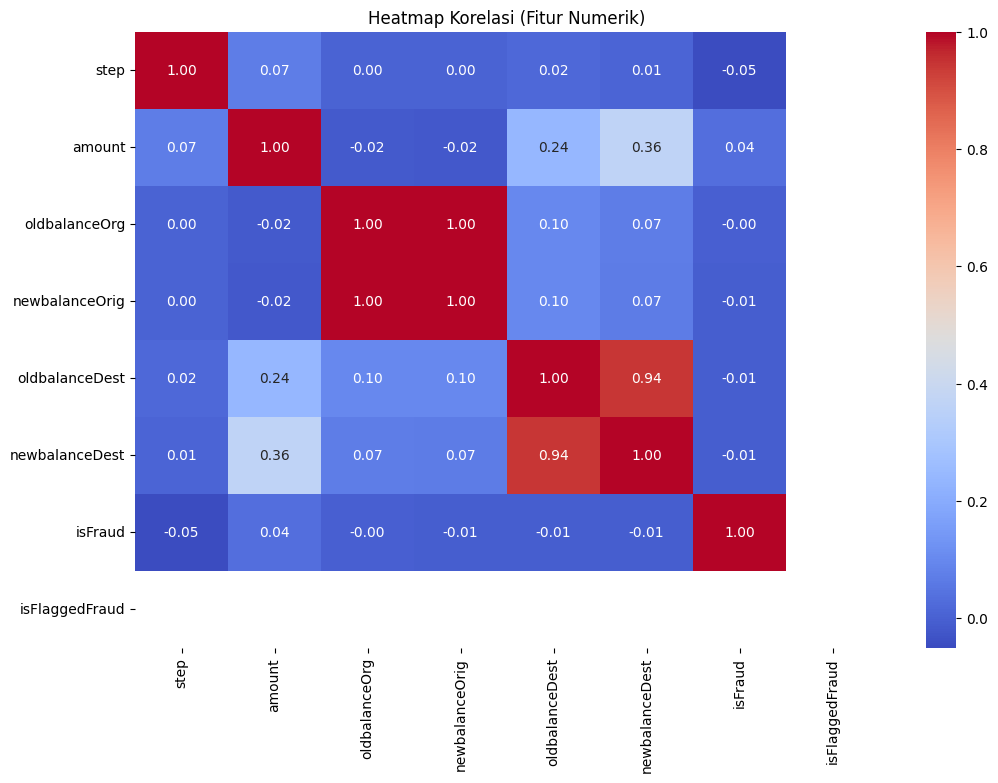

In [ ]:
# Korelasi antar fitur numerik
numeric_df = df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']]
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Heatmap Korelasi (Fitur Numerik)")
plt.show()


Disimpulkan bahwa beberapa fitur memiliki korelasi sangat tinggi satu sama lain, yang menunjukkan kemungkinan redundansi, hubungan antara fitur numerik dan target isFraud bersifat lemah secara linear sehingga pendekatan machine learning yang lebih kompleks diperlukan, serta diperlukan tahapan preprocessing lanjutan seperti normalisasi, handling outlier, dan teknik imbalance handling sebelum membangun model.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.
Berikut adalah tahapan-tahapan yang dilakukan:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [9]:
# 1. Handling Missing Values
df = df.dropna()

In [10]:
# 2. Hapus Data Duplikat
df = df.drop_duplicates()

In [11]:
# 3. Hapus fitur tidak relevan
df = df.drop(columns=['nameOrig', 'nameDest']) ## karena biasanya ID unik yang tidak berguna untuk prediksi

In [12]:
# 4. Label Encoding & Normalisasi (Scaling numerik)
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
num_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [13]:
# 5. Deteksi Outlier
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['amount'] >= Q1 - 1.5 * IQR) & (df['amount'] <= Q3 + 1.5 * IQR)]

In [14]:
# 7. Binning (0 = low, 1 = medium, 2 = high, 3 = very high)
df['amount_bin'] = pd.qcut(df['amount'], q=4, labels=False)

In [15]:
# Simpan hasil preprocessing
df.to_csv("onlinepaymentfraud_preprocessing.csv", index=False)